Imports:

In [393]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [394]:
%run ./Dados.ipynb
%run ./Funcoes.ipynb

Funções:

In [395]:
# Função que faz o processamento dos dados para a criação dos gráficos de idades.
def ProcessamentoIdade(df, ano):
    copia_df = df.copy()
    try:
        copia_df = ParteDataFrame(copia_df, ["ANO_NASCIMENTO", "SEXO", "CURSO"])
        copia_df["IDADE"] = CalculaIdades(copia_df["ANO_NASCIMENTO"], ano)
        copia_df["AREA"] = GruposDicio(copia_df["CURSO"], cursos_areas)
        copia_df = RemoveColunas(copia_df, "ANO_NASCIMENTO")
        copia_df = RemoveColunas(copia_df, "CURSO")
        copia_df = pd.concat([ColLoc(copia_df, "SEXO", "F"), ColLoc(copia_df, "SEXO", "M")])
        return copia_df
    except:
        print("Erro")
        return df

In [396]:
# Função que constrói os gráficos de idades.
def IdadePlot(df, palette, ax, titulo="", titulo_tamanho=15, despine=False, x="IDADE", hue="SEXO"):
    # Gráfico
    grafico = sns.kdeplot(data=df, x=x, hue=hue, palette=CoresPalette(df[hue], palette), ax=ax, fill=True)

    # Aparência
    grafico.set(xlabel="Idade", ylabel="Densidade")
    grafico.set_title(titulo, fontsize=titulo_tamanho, y=1.05)
    ax.legend(title='Sexo', loc='upper right', labels=['Masculino', 'Feminino'])
    LabelNumeros(coluna=df[x], ax=ax, label="x", fim=100, distancia=10)
    if despine:
        sns.despine(top=True , right=True, left=False, bottom=False)

    return grafico

Processamento dos dados:

In [397]:
# 2021
df_idades21 = ProcessamentoIdade(df21, 2021)

# 2022
df_idades22 = ProcessamentoIdade(df22, 2022)

# Gráficos de Idades:

# 2021

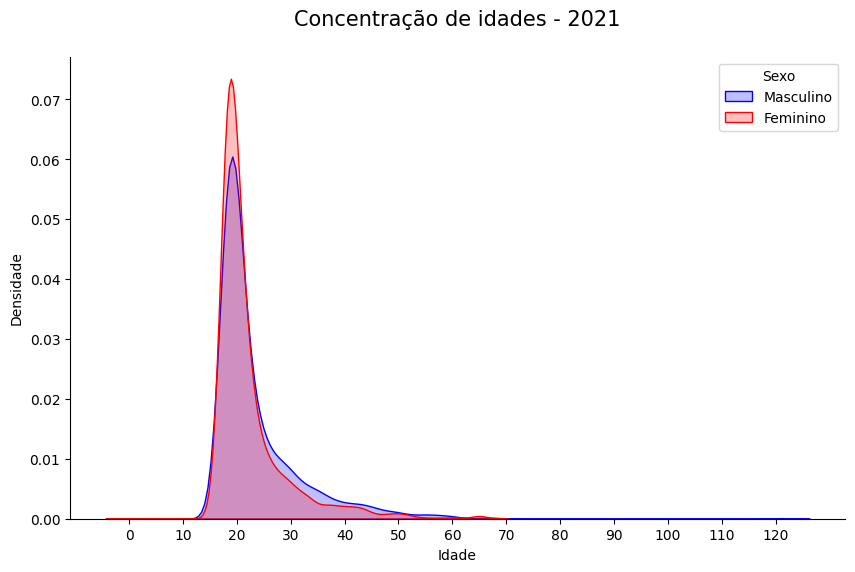

In [398]:
# Cria a figura e o gráfico de concentração de idades dos alunos matriculados no ano de 2021, divididos pelo sexo.

# Figura
idades_geral21, pos1 = plt.subplots(nrows = 1, ncols=1, figsize=(10, 6))

# Gráfico
IdadePlot(df_idades21, sexo_palette, pos1, titulo="Concentração de idades - 2021",  despine=True)

plt.show(idades_geral21)

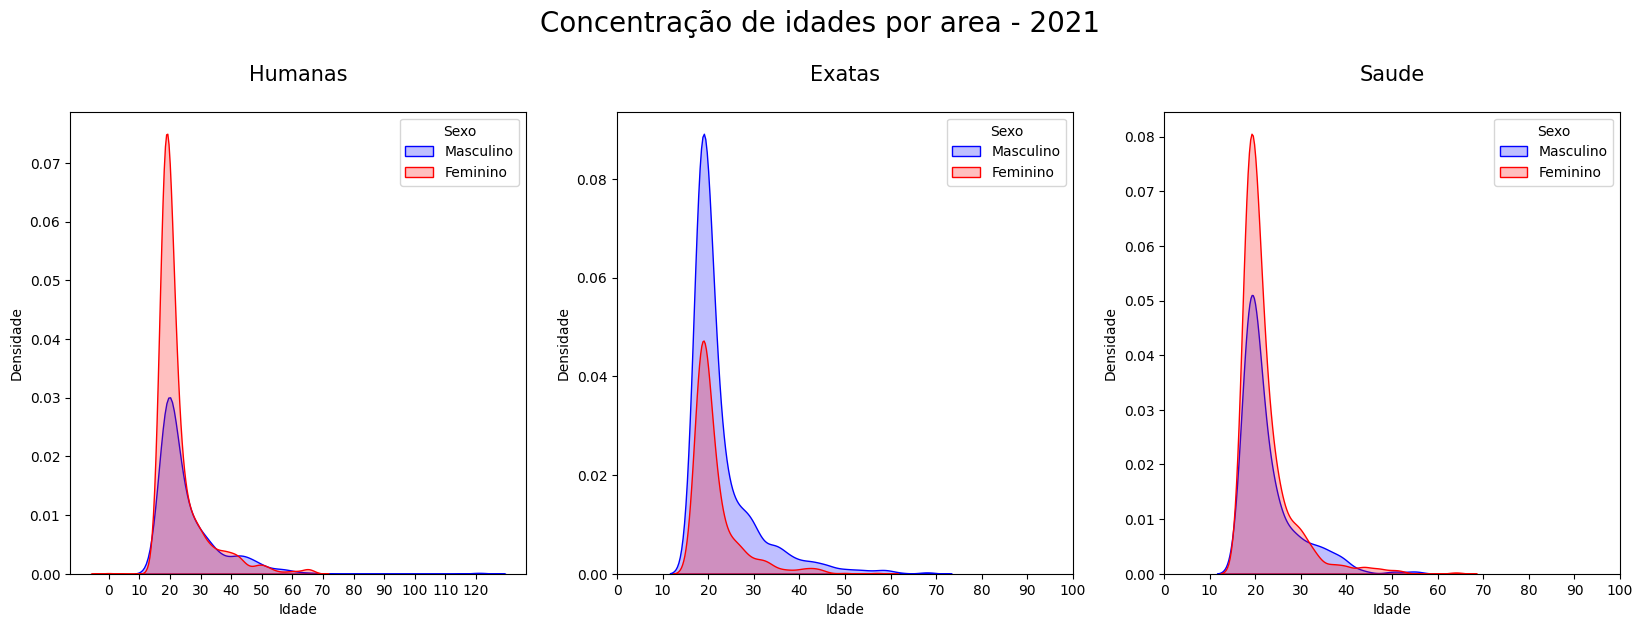

In [399]:
# Cria a figura e os gráficos de concentração de idades divididos pelas áreas de ensino, referentes ao ano de 2021.

# Figura
idades_area21, pos2 = plt.subplots(nrows = 1, ncols=3, figsize=(20, 6))
idades_area21.suptitle("Concentração de idades por area - 2021", fontsize=20, y=1.05)

# Gráficos
IdadePlot(ColLoc(df_idades21, "AREA", "HUMANAS"), sexo_palette, pos2[0], titulo="Humanas")
IdadePlot(ColLoc(df_idades21, "AREA", "EXATAS"), sexo_palette, pos2[1], titulo="Exatas")
IdadePlot(ColLoc(df_idades21, "AREA", "SAUDE"), sexo_palette, pos2[2], titulo="Saude")

plt.show(idades_area21)

# 2022

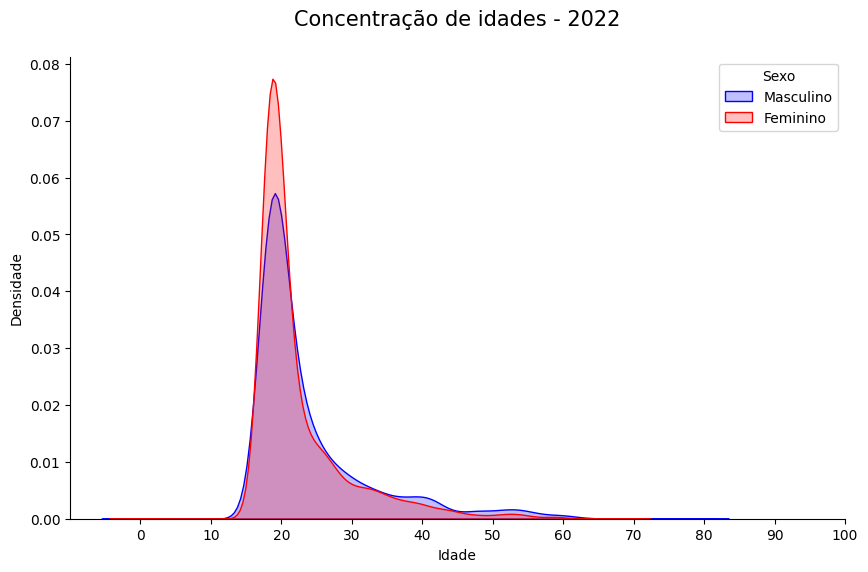

In [400]:
# Cria a figura e o gráfico de concentração de idades dos alunos matriculados no ano de 2022, divididos pelo sexo.

# Figura
idades_geral22, pos3 = plt.subplots(figsize=(10, 6))

# Gráfico
IdadePlot(df_idades22, sexo_palette, pos3, titulo="Concentração de idades - 2022", despine=True)

plt.show(idades_geral22)

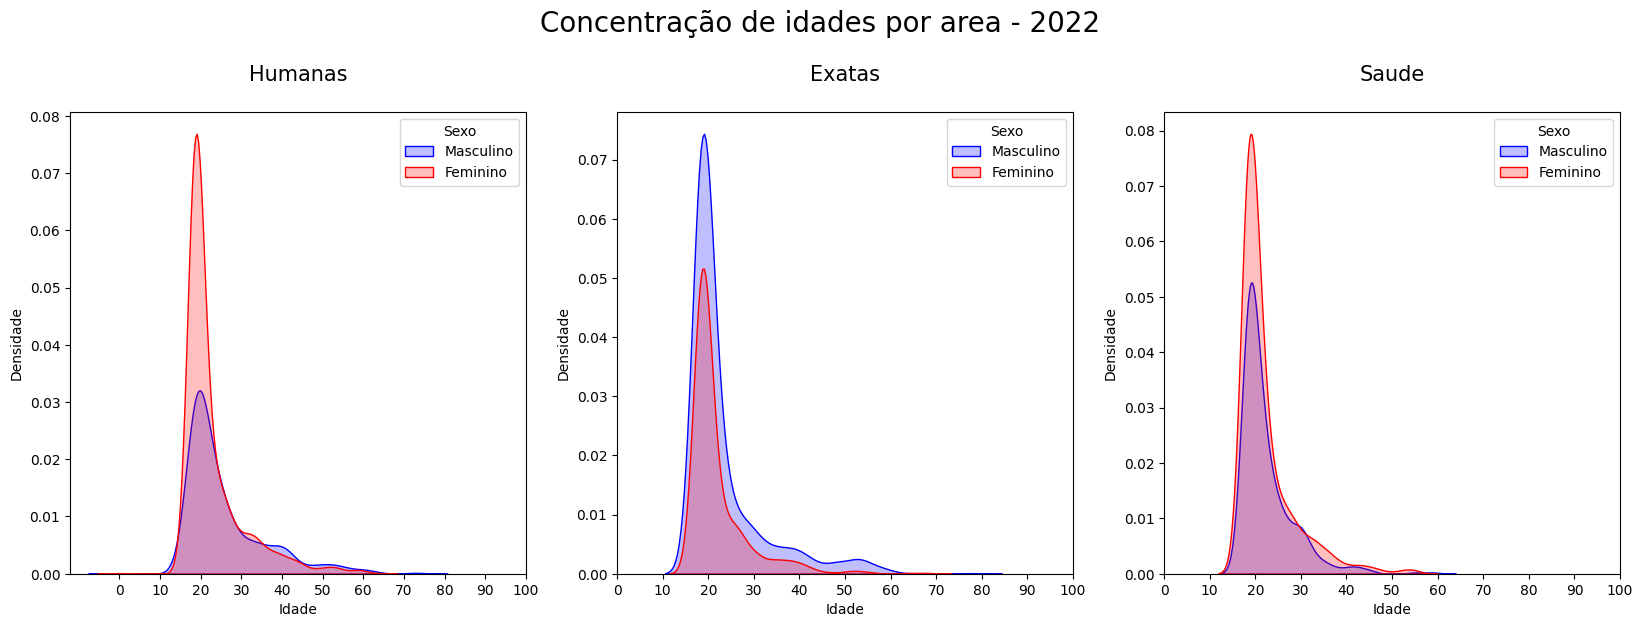

In [401]:
# Cria a figura e os gráficos de concentração de idades divididos pelas áreas de ensino, referentes ao ano de 2022.

# Figura
idades_area22, pos4 = plt.subplots(nrows = 1, ncols=3, figsize=(20, 6))
idades_area22.suptitle("Concentração de idades por area - 2022", fontsize=20, y=1.05)

# Gráficos
IdadePlot(ColLoc(df_idades22, "AREA", "HUMANAS"), sexo_palette, pos4[0], titulo="Humanas")
IdadePlot(ColLoc(df_idades22, "AREA", "EXATAS"), sexo_palette, pos4[1], titulo="Exatas")
IdadePlot(ColLoc(df_idades22, "AREA", "SAUDE"), sexo_palette, pos4[2], titulo="Saude")

plt.show(idades_area22)